### Generating subplots dynamically

The goal is plotting dynamically while excluding empty plots so we get clean subplots.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Example 1: Q -> Q**

In [61]:
df = pd.read_csv('data/advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales'])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


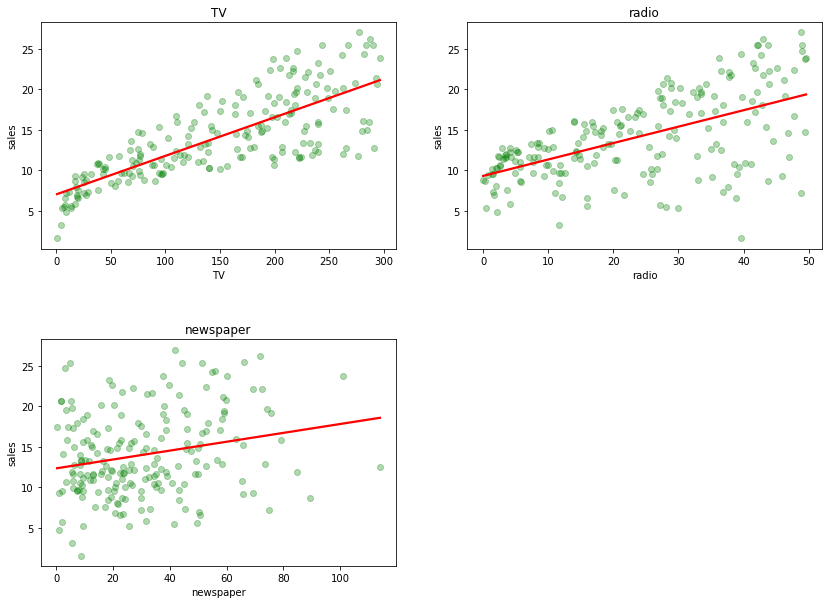

In [66]:
# list of independent variables -> x_axis
x_ax = ['TV', 'radio', 'newspaper']
y_ax = 'sales' # target variable -> y_axis

fig_cols = 2 # number of columns in the subplot fig
fig_rows = -(-len(x_ax)//fig_cols) # calculating the proper number of rows
plots_qty = len(x_ax)

# plotting with reg line
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(14,10), gridspec_kw={'hspace': 0.4})
for i in range(plots_qty):
    row = i // fig_cols
    col = i % fig_cols
    ax_curr = axes[row, col]
    sns.regplot(x=x_ax[i], y=y_ax, data=df, ax=ax_curr, ci=None,
                scatter_kws={'color': 'green', 'alpha':0.3}, line_kws={'color': 'red'})
    ax_curr.set_title(x_ax[i])
    
# making not visible the empty subplots
to_set_off = fig_cols * fig_rows - plots_qty
for i in range(1, to_set_off+1): # +1 because the range function 
                                 # does not include the value of the stop param
    axes.flat[-i].set_visible(False) # setting off empty subplots

**Example 2: Q -> C**

In [7]:
# let's use the iris flowers dataset.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv" 
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] 
df = pd.read_csv(url, names=features)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


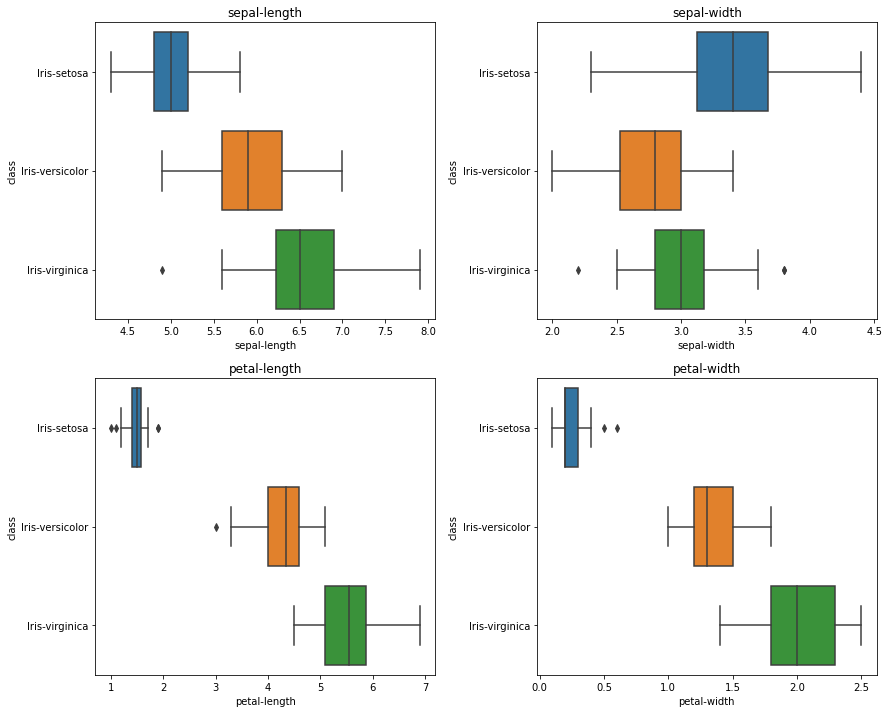

In [59]:
# list of independent variables -> x_axis
x_ax = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
y_ax = 'class' # target variable -> y_axis

fig_cols = 2 # number of columns in the subplot fig
fig_rows = -(-len(x_ax)//fig_cols) # calculating the optimal number of rows
plots_qty = len(x_ax) # number of subplots

# plotting boxplots
# use figsize and gridspec_kw to customize the subplots
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(14,12), gridspec_kw={'hspace': 0.2, 'wspace':0.3})
for i in range(plots_qty):
    row = i // fig_cols
    col = i % fig_cols
    ax_curr = axes[row, col]
    sns.boxplot(x=x_ax[i], y=y_ax, data=df, ax=ax_curr)
    ax_curr.set_title(x_ax[i]) # setting title to each subplot
    
# making not visible the empty subplots
to_set_off = fig_cols * fig_rows - plots_qty
for i in range(1, to_set_off+1): # +1 because the range function 
                                 # does not include the value of the stop param
    axes.flat[-i].set_visible(False) # setting off empty subplots